In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract as pyt
import glob
import cv2
import pandas as pd
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import tensorflow as tf
import os
from keras.callbacks import TensorBoard

from time import strftime

In [7]:
LOG_DIR = 'tensorboard_logs/'

In [8]:
x_train = cv2.imread('resized/b1.png',0)

In [9]:
x_train

array([[ 85,  84,  84,  84,  80,  81,  81,  82,  78,  76,  76,  79,  82,
         82,  82,  81,  81,  84,  80,  79,  78,  82,  88,  87,  82,  79,
         77,  79],
       [ 84,  84,  84,  83,  79,  80,  82,  83,  83,  81,  82,  82,  82,
         82,  82,  81,  80,  83,  83,  81,  79,  82,  85,  86,  84,  80,
         77,  78],
       [ 83,  84,  83,  82,  78,  78,  82,  83,  86,  87,  91,  92,  89,
         88,  88,  87,  88,  88,  86,  85,  82,  83,  84,  84,  84,  82,
         77,  75],
       [ 79,  83,  83,  82,  78,  77,  81,  83,  87, 101, 161, 188, 188,
        188, 188, 188, 188, 154,  95,  87,  84,  83,  84,  84,  84,  83,
         81,  79],
       [ 79,  81,  82,  83,  80,  78,  80,  81,  94, 151, 188, 188, 188,
        188, 188, 188, 188, 188, 107,  88,  84,  83,  84,  84,  84,  83,
         82,  81],
       [ 83,  83,  83,  83,  82,  81,  80,  81, 104, 173, 188, 188, 180,
        177, 177, 177, 177, 141,  90,  86,  86,  86,  85,  83,  83,  83,
         83,  81],
       [ 8

In [10]:
x_train.shape

(28, 28)

In [11]:
x_train = x_train.reshape(1,784)

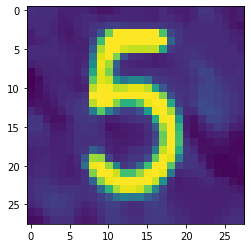

In [12]:
plt.imshow(x_train.reshape(28,28))
plt.show()

In [13]:
x_train

array([[ 85,  84,  84,  84,  80,  81,  81,  82,  78,  76,  76,  79,  82,
         82,  82,  81,  81,  84,  80,  79,  78,  82,  88,  87,  82,  79,
         77,  79,  84,  84,  84,  83,  79,  80,  82,  83,  83,  81,  82,
         82,  82,  82,  82,  81,  80,  83,  83,  81,  79,  82,  85,  86,
         84,  80,  77,  78,  83,  84,  83,  82,  78,  78,  82,  83,  86,
         87,  91,  92,  89,  88,  88,  87,  88,  88,  86,  85,  82,  83,
         84,  84,  84,  82,  77,  75,  79,  83,  83,  82,  78,  77,  81,
         83,  87, 101, 161, 188, 188, 188, 188, 188, 188, 154,  95,  87,
         84,  83,  84,  84,  84,  83,  81,  79,  79,  81,  82,  83,  80,
         78,  80,  81,  94, 151, 188, 188, 188, 188, 188, 188, 188, 188,
        107,  88,  84,  83,  84,  84,  84,  83,  82,  81,  83,  83,  83,
         83,  82,  81,  80,  81, 104, 173, 188, 188, 180, 177, 177, 177,
        177, 141,  90,  86,  86,  86,  85,  83,  83,  83,  83,  81,  83,
         83,  83,  83,  83,  82,  81,  82, 117, 182

In [14]:
labels = pd.read_csv('labels.csv')

In [15]:
labels

,label
0,31
1,34
2,28
3,33
4,12
...,...
571,2
572,10
573,10
574,19


In [16]:
lis=[]
for i in range (1, 785):
    lis.append(i)

In [17]:
lis

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [18]:
df = pd.DataFrame(data=x_train, columns=lis)

In [19]:
df

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,85,84,84,84,80,81,81,82,78,76,...,87,84,83,81,80,80,82,84,85,85


In [20]:
for i in range (2, 577):
    x_train = cv2.imread('resized/b'+str(i)+'.png',0)
    x_train = x_train.reshape(1,784)
    df = df.append(pd.DataFrame(data=x_train, columns=lis))
#for i in range (1, 113):
#    x_train1 = cv2.imread('resized/a'+str(i)+'.png',0)
#    x_train1 = x_train.reshape(1,784)
#    df = df.append(pd.DataFrame(data=x_train1, columns=lis))

C:\Users\devbh\AppData\Local\Temp\ipykernel_18912\954294210.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=x_train, columns=lis))
C:\Users\devbh\AppData\Local\Temp\ipykernel_18912\954294210.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=x_train, columns=lis))
C:\Users\devbh\AppData\Local\Temp\ipykernel_18912\954294210.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=x_train, columns=lis))
C:\Users\devbh\AppData\Local\Temp\ipykernel_18912\954294210.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(

In [21]:
df

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,85,84,84,84,80,81,81,82,78,76,...,87,84,83,81,80,80,82,84,85,85
0,81,75,70,67,70,74,75,74,71,70,...,69,69,61,59,57,56,57,59,54,43
0,69,55,57,62,64,65,70,68,70,73,...,82,84,86,84,82,84,84,85,84,75
0,84,79,78,79,76,82,83,77,80,84,...,80,88,89,83,82,83,83,87,96,96
0,50,47,47,45,44,41,41,42,47,51,...,49,50,51,54,51,50,53,54,56,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,84,79,78,79,76,82,83,78,78,84,...,79,86,88,84,81,82,83,88,97,96
0,29,29,23,21,27,30,32,30,20,18,...,23,21,21,21,21,21,24,27,29,25
0,29,28,19,6,7,13,20,25,20,13,...,22,20,20,26,29,29,23,14,24,37
0,32,28,26,27,34,37,31,28,31,23,...,25,32,20,19,28,27,33,22,20,25


In [22]:
df = df.reset_index()

In [23]:
df

,index,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,85,84,84,84,80,81,81,82,78,...,87,84,83,81,80,80,82,84,85,85
1,0,81,75,70,67,70,74,75,74,71,...,69,69,61,59,57,56,57,59,54,43
2,0,69,55,57,62,64,65,70,68,70,...,82,84,86,84,82,84,84,85,84,75
3,0,84,79,78,79,76,82,83,77,80,...,80,88,89,83,82,83,83,87,96,96
4,0,50,47,47,45,44,41,41,42,47,...,49,50,51,54,51,50,53,54,56,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0,84,79,78,79,76,82,83,78,78,...,79,86,88,84,81,82,83,88,97,96
572,0,29,29,23,21,27,30,32,30,20,...,23,21,21,21,21,21,24,27,29,25
573,0,29,28,19,6,7,13,20,25,20,...,22,20,20,26,29,29,23,14,24,37
574,0,32,28,26,27,34,37,31,28,31,...,25,32,20,19,28,27,33,22,20,25


In [24]:
data = pd.concat([labels, df], axis=1)

In [25]:
data

,label,index,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,31,0,85,84,84,84,80,81,81,82,...,87,84,83,81,80,80,82,84,85,85
1,34,0,81,75,70,67,70,74,75,74,...,69,69,61,59,57,56,57,59,54,43
2,28,0,69,55,57,62,64,65,70,68,...,82,84,86,84,82,84,84,85,84,75
3,33,0,84,79,78,79,76,82,83,77,...,80,88,89,83,82,83,83,87,96,96
4,12,0,50,47,47,45,44,41,41,42,...,49,50,51,54,51,50,53,54,56,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2,0,84,79,78,79,76,82,83,78,...,79,86,88,84,81,82,83,88,97,96
572,10,0,29,29,23,21,27,30,32,30,...,23,21,21,21,21,21,24,27,29,25
573,10,0,29,28,19,6,7,13,20,25,...,22,20,20,26,29,29,23,14,24,37
574,19,0,32,28,26,27,34,37,31,28,...,25,32,20,19,28,27,33,22,20,25


In [26]:
del data['index']

In [27]:
data

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,31,85,84,84,84,80,81,81,82,78,...,87,84,83,81,80,80,82,84,85,85
1,34,81,75,70,67,70,74,75,74,71,...,69,69,61,59,57,56,57,59,54,43
2,28,69,55,57,62,64,65,70,68,70,...,82,84,86,84,82,84,84,85,84,75
3,33,84,79,78,79,76,82,83,77,80,...,80,88,89,83,82,83,83,87,96,96
4,12,50,47,47,45,44,41,41,42,47,...,49,50,51,54,51,50,53,54,56,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2,84,79,78,79,76,82,83,78,78,...,79,86,88,84,81,82,83,88,97,96
572,10,29,29,23,21,27,30,32,30,20,...,23,21,21,21,21,21,24,27,29,25
573,10,29,28,19,6,7,13,20,25,20,...,22,20,20,26,29,29,23,14,24,37
574,19,32,28,26,27,34,37,31,28,31,...,25,32,20,19,28,27,33,22,20,25


In [28]:
data.label.nunique()

30

In [29]:
letters_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',
             7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
             14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',
             21:'V',22:'W',23:'X', 24:'Y',25:'Z', 26:0, 27:1, 
             28:2, 29:3, 30:4, 31:5, 32:6, 33:7, 34:8, 35:9}

In [30]:
# Split data to Features X and labels y
X = data.drop('label',axis = 1)
y = data.label
#get the shape of labels and features 
print(f'Features shape is :{X.shape}')
print(f'Shape of the class column is :{y.shape}')
#split into train and test set into 9:1 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Features shape is :(576, 784)
Shape of the class column is :(576,)


((518, 784), (58, 784), (518,), (58,))

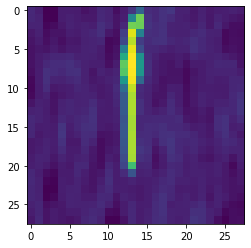

In [31]:
plt.imshow(x_train[0].reshape(28,28))
plt.show()

In [32]:
# scale data
scaler = MinMaxScaler()
scaler.fit(X_train)
#scaling data 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[1:10]

array([[0.47887324, 0.45070423, 0.32894737, ..., 0.06329114, 0.04938272,
        0.07317073],
       [0.47887324, 0.45070423, 0.5       , ..., 0.56962025, 0.48148148,
        0.5       ],
       [0.21126761, 0.1971831 , 0.13157895, ..., 0.06329114, 0.09876543,
        0.2804878 ],
       ...,
       [0.50704225, 0.46478873, 0.5       , ..., 0.56962025, 0.49382716,
        0.53658537],
       [1.        , 1.        , 1.        , ..., 0.93670886, 0.81481481,
        0.81707317],
       [0.1971831 , 0.18309859, 0.13157895, ..., 0.05063291, 0.09876543,
        0.30487805]])

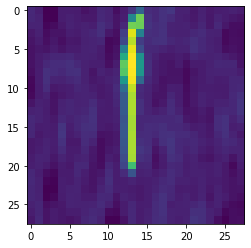

In [33]:
plt.imshow(x_train[0].reshape(28,28))
plt.show()

In [34]:
def get_tensorboard(model_name):
    folder_name = f'model at {strftime("%I %M")}'
    dir_path = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_path)
    except OSError as err:
        print(err.strerror)
    else:
        print("Successfully created the directory %s " % folder_name)

    return TensorBoard(log_dir=dir_path)

In [35]:
Model = Sequential([
    Dense(input_shape=(784,), units=576, activation='relu'),
    Dense(units=288, activation='relu'),
    Dense(units=144, activation='relu'),
    Dense(units=72, activation='relu'),
    Dense(units=36, activation='softmax')])

Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
samples_per_batch = 100

In [37]:
Model.fit(X_train, y_train, epochs=55, batch_size=samples_per_batch, validation_data=(X_test, y_test), callbacks=[get_tensorboard('Model')])

Successfully created the directory model at 02 38 
Epoch 1/55
6/6 [==============================] - 2s 76ms/step - loss: 3.5264 - accuracy: 0.0541 - val_loss: 3.3606 - val_accuracy: 0.1034
Epoch 2/55
6/6 [==============================] - 0s 14ms/step - loss: 3.2803 - accuracy: 0.1429 - val_loss: 3.0522 - val_accuracy: 0.2241
Epoch 3/55
6/6 [==============================] - 0s 13ms/step - loss: 2.9863 - accuracy: 0.2046 - val_loss: 2.7904 - val_accuracy: 0.2069
Epoch 4/55
6/6 [==============================] - 0s 13ms/step - loss: 2.6494 - accuracy: 0.2934 - val_loss: 2.3081 - val_accuracy: 0.5690
Epoch 5/55
6/6 [==============================] - 0s 12ms/step - loss: 2.3690 - accuracy: 0.3764 - val_loss: 2.1478 - val_accuracy: 0.4655
Epoch 6/55
6/6 [==============================] - 0s 15ms/step - loss: 2.0530 - accuracy: 0.5019 - val_loss: 1.7098 - val_accuracy: 0.4828
Epoch 7/55
6/6 [==============================] - 0s 8ms/step - loss: 1.6784 - accuracy: 0.5695 - val_loss: 1.6243 

In [38]:
final_accuracies = Model.evaluate(X_test,y_test,verbose=0)
print('Validation Loss : {:.2f}'.format(final_accuracies[0]))
print('Validation Accuracy: {:.2f}'.format(final_accuracies[1]))

Validation Loss : 0.14
Validation Accuracy: 0.97


TypeError: Image data of dtype object cannot be converted to float

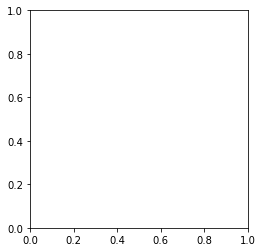

In [39]:
def get_and_solve_img2(path):
        text_word=''
        img = cv2.imread(path,0)
        plt.imshow(img)
        plt.show()
        for i in range (4):
                input = cv2.imread(path,0)
                start_row, start_col = int(input.shape[0]*0.4), int(input.shape[1]*(0+i*0.25))
                end_row, end_col = int(input.shape[0]*0.55), int(input.shape[1]*(0.2+ i*0.25))
                cropped = input[start_row:end_row, start_col:end_col]
                cropped = cv2.medianBlur(cropped,5)
                resized = cv2.resize(cropped, (28,28), interpolation = cv2.INTER_AREA)
                resized = cv2.bitwise_not(resized)
                resized = np.resize(resized, (1,784))
                prediction = letters_dict[np.argmax(Model.predict(resized))]
                text_word = text_word + str(prediction)
                text_word = text_word.lower()
        return text_word

tst = get_and_solve_img2('traindata/b1.png')
print(tst)

In [42]:
text_word=''
img = cv2.imread('https://irctclive.nlpcaptcha.in/index.php/media/getTC/F62F_dXpZdUxvM2RnenZLUEd1WUJQL1ArSm1udGNkSys2TEV4STlhK3QwZWs2dnlOZ1JxVDFxNS9rWlB2akl3eGZyak5OVVVJbkRXY25GTmpDdlRCeG9ydUE9PQ==/300x250.png', 0)
for i in range (4):
    start_row, start_col = int(img.shape[0]*0.35), int(img.shape[1]*(0.05+0.21*i))
    end_row, end_col = int(img.shape[0]*0.65), int(img.shape[1]*(.17+0.30*i))
    cropped = img[start_row:end_row, start_col:end_col]

    resized = cv2.resize(cropped, (28,28), interpolation = cv2.INTER_AREA)
    resized = cv2.bitwise_not(resized)
    resized = cv2.fastNlMeansDenoising(resized, None, 20, 7, 21) 
    #cv2.imwrite('resized/b'+ str(k) + '.png', resized)
    resized = np.resize(resized, (1,784))
    prediction = letters_dict[np.argmax(Model.predict(resized))]
    text_word = text_word + str(prediction)
    text_word = text_word.lower()
print(text_word)

AttributeError: 'NoneType' object has no attribute 'shape'